In [1]:
import numpy as np
class activation_func:
    
    def sigmoid(n):
        a = 1 / (1+ np.exp(-n))
        return a

    def satlin(n):
        if n<0:
            return 0
        elif 0 <= n <= 1:
            return n
        else:
            return 1

    def satlins(n):
        if n<-1:
            return -1
        elif -1 <= n <= 1:
            return n
        else:
            return 1

    def purelin(n):
        return n

    def hardlim(n):
        if n < 0:
            return 0
        else:
            return 1

    def hardlims(n):
        if n < 0:
            return -1
        else:
            return 1

    def poslin(n):
        if n < 0:
            return 0
        else:
            return n

    def compet(*n):

        return np.array(n).max()

    def hyptansig(n):
        a = (np.exp(n) - np.exp(-n))/(np.exp(n) + np.exp(-n))
        return a[0,0]

excercise

In [2]:
sigmoid = activation_func.sigmoid

In [3]:
w = np.array([[3,2]])
p = np.array([[-5,6]]).transpose()
b = 1.2
n = w.dot(p) + b

In [4]:
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
        
    def feedforward(self, inputs):
        
        total = np.dot(self.weights,inputs) + self.bias
        
        return sigmoid(total)

In [5]:
neu = Neuron(weights=np.array([0,1]), bias=4)
neu.feedforward(inputs=np.array([2,3]))

0.9990889488055994

In [6]:
class MyNeuralNetwork:
    '''
      A neural network with:
        - 2 inputs
        - a hidden layer with 2 neurons (h1, h2)
        - an output layer with 1 neuron (o1)

      *** DISCLAIMER ***:
      The code below is intended to be simple and educational, NOT optimal.
      Real neural net code looks nothing like this. DO NOT use this code.
      Instead, read/run it to understand how this specific network works.
      '''
    def __init__(self, weights=None, bias=None):
        # Weights
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()
        
        # Biases
        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()
        
        self.weights = np.array(self.w1,self.w2,self.w3,self.w4,self.w5,self.w6)
        self.bias = np.array(self.b1,self.b2,self.b3)
        
        self.h1 = Neuron(self.weights, bias)
        self.h2 = Neuron(self.weights, bias)
        
        self.o1 = Neuron(self.weights, bias)
        
    def feedforward(self, inputs):
        
        h1_out = self.h1.feedforward(inputs)
        h2_out = self.h2.feedforward(inputs)
        
        o1_out = self.o1.feedforward(np.array([h1_out,h2_out]))
        
        return o1_out

In [7]:
-2 * (sigmoid(-3) * (1 - sigmoid(-3)))


-0.09035331946182427

In [7]:
import matplotlib.pyplot as plt
def deriv_sigmoid(x):
        return sigmoid(x) * (1-sigmoid(x))
        
def mse_loss_func(y_true, y_preds):
    return ((y_true-y_preds)**2).mean()


class OurNeuralNetwork:
    '''
      A neural network with:
        - 2 inputs
        - a hidden layer with 2 neurons (h1, h2)
        - an output layer with 1 neuron (o1)

      *** DISCLAIMER ***:
      The code below is intended to be simple and educational, NOT optimal.
      Real neural net code looks nothing like this. DO NOT use this code.
      Instead, read/run it to understand how this specific network works.
      '''
    def __init__(self, weights=None, bias=None):
        # Weights
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()
        
        # Biases
        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()
        
        
        self.losses = []
        self.epoches = []

    def feedforward(self, x):
        
        h1 = sigmoid(x[0]*self.w1 + x[1]*self.w2 + self.b1)
        h2 = sigmoid(x[0]*self.w3 + x[1]*self.w4 + self.b2)
        
        o1 = sigmoid(h1*self.w5 + h2*self.w6 + self.b3)
        
        return o1
    
    def train(self,data,y_trues):
        # data is a (n x 2) numpy array 
        # y_trues is (n,) numpy array of true labels
        
        learning_rate = 0.2
        epochs = 1000
        
        for epoch in range(epochs):
            for x,y_true in zip(data,y_trues):
                
                
                h1_sum = x[0]*self.w1 + x[1]*self.w2 + self.b1
                h1 = sigmoid(h1_sum)
                
                h2_sum = x[0]*self.w3 + x[1]*self.w4 + self.b2
                h2 = sigmoid(h2_sum)
                
                o1_sum = h1*self.w5 + h2*self.w6 + self.b3
                o1 = sigmoid(o1_sum)
                
                y_pred = o1
                
                # Find all partial differentials
                
                # **Note** d_L_d_ypred denote partial L/ partial y_pred
                
                d_L_d_ypred = -2*(y_true-y_pred)
                
                # Neuron h1 
                d_h1_d_w1 = x[0] * deriv_sigmoid(h1_sum)
                d_h1_d_w2 = x[1] * deriv_sigmoid(h1_sum)
                d_h1_d_b1 = deriv_sigmoid(h1_sum)
                
                # Neuron h2
                d_h2_d_w3 = x[0] * deriv_sigmoid(h2_sum)
                d_h2_d_w4 = x[1] * deriv_sigmoid(h2_sum)
                d_h2_d_b2 = deriv_sigmoid(h2_sum)
                
                # Output Neuron o1
                d_ypred_d_h1 = self.w5 * deriv_sigmoid(o1_sum)
                d_ypred_d_h2 = self.w6 * deriv_sigmoid(o1_sum)
                d_ypred_d_b3 = deriv_sigmoid(o1_sum)
                d_ypred_d_w5 = h1 * deriv_sigmoid(o1_sum)
                d_ypred_d_w6 = h2 * deriv_sigmoid(o1_sum)
                
                
                # Updating Weights
                # neuron h1
                self.w1 -= learning_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
                self.w2 -= learning_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
                self.b1 -= learning_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1
                
                # Neuron h2
                self.w3 -= learning_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
                self.w4 -= learning_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
                self.b2 -= learning_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2
                
                # Neuron o1
                self.w5 -= learning_rate * d_L_d_ypred * d_ypred_d_w5
                self.w6 -= learning_rate * d_L_d_ypred * d_ypred_d_w6
                self.b3 -= learning_rate * d_L_d_ypred * d_ypred_d_b3
                
                
            if epoch % 10 == 0:
                y_preds = np.apply_along_axis(self.feedforward, 1, data)
                loss = mse_loss_func(y_trues, y_preds)
                print('Epoch :{} Loss: {}'.format(epoch,loss))

                self.epoches.append(epoch)
                self.losses.append(loss)
                    
    def Plot(self):
        plt.plot(self.losses,self.epoches)
        plt.xlabel('Loss')
        plt.ylabel('Epoch')
        plt.title('Epoch vs Loss')
        
        

In [8]:
import pandas as pd
df = pd.DataFrame({'Name':['Alice','Bob','Charlie','Diana'], 'Weight (lb)':[133,160,152,120], 'Height (in)':[65,72,70,60], 'Gender':['F','M','M','F']})

In [9]:
df['Weight (lb)'] = df['Weight (lb)'] - 135
df['Height (in)'] = df['Height (in)'] - 66

In [10]:
df

,Name,Weight (lb),Height (in),Gender
0,Alice,-2,-1,F
1,Bob,25,6,M
2,Charlie,17,4,M
3,Diana,-15,-6,F


In [11]:
data = df[['Weight (lb)', 'Height (in)']].values
y = df['Gender'].apply(lambda val: 1 if val =='F' else 0).values

In [14]:
nn_obj = OurNeuralNetwork()
nn_obj.train(data,y)

Epoch :0 Loss: 0.3593899183619651
Epoch :10 Loss: 0.13417100534825216
Epoch :20 Loss: 0.08164156280075743
Epoch :30 Loss: 0.056373440722005515
Epoch :40 Loss: 0.041793433135192015
Epoch :50 Loss: 0.03264779521451286
Epoch :60 Loss: 0.026512035102057123
Epoch :70 Loss: 0.02216933482984273
Epoch :80 Loss: 0.018962367727671244
Epoch :90 Loss: 0.016512083489381223
Epoch :100 Loss: 0.014587382101258359
Epoch :110 Loss: 0.013040589874292017
Epoch :120 Loss: 0.01177352294589599
Epoch :130 Loss: 0.01071866154479475
Epoch :140 Loss: 0.009828210591785855
Epoch :150 Loss: 0.009067480957677464
Epoch :160 Loss: 0.008410741143339048
Epoch :170 Loss: 0.007838535588071726
Epoch :180 Loss: 0.007335903082636577
Epoch :190 Loss: 0.006891164122710705
Epoch :200 Loss: 0.00649507745834611
Epoch :210 Loss: 0.006140241933064897
Epoch :220 Loss: 0.005820664785176036
Epoch :230 Loss: 0.005531445105352189
Epoch :240 Loss: 0.005268538358919409
Epoch :250 Loss: 0.005028578888771328
Epoch :260 Loss: 0.0048087444964

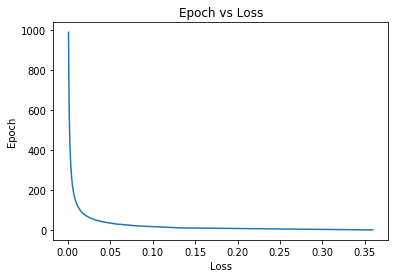

In [15]:
nn_obj.Plot()

In [16]:
fatimah = np.array([-7,-3])
hassan = np.array([20,2])

In [17]:
nn_obj.feedforward(fatimah)

0.97619229703903

In [18]:
nn_obj.feedforward(hassan)

0.038150105444891995

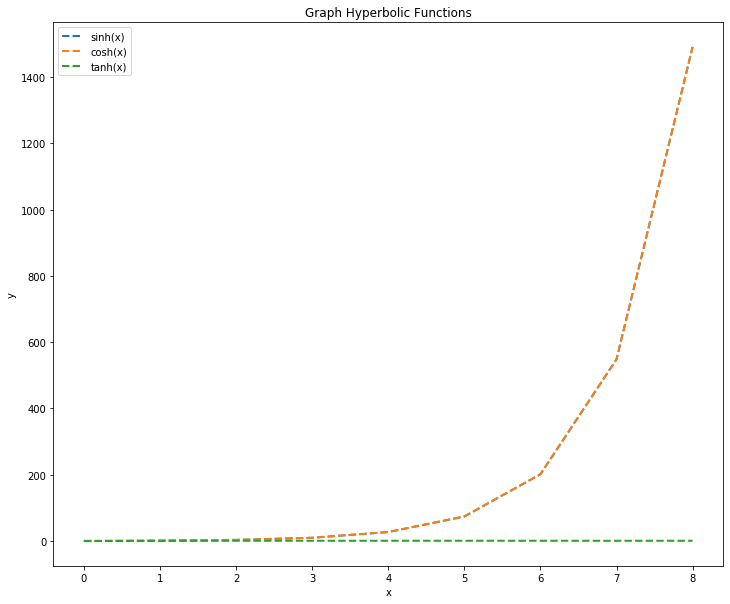

In [77]:
x = np.arange(9)
sinh = (np.exp(x) - np.exp(-x))/2
cosh = (np.exp(x) + np.exp(-x))/2
tanh = sinh/cosh
plt.figure(figsize=(12,10))
for name, y in zip(['sinh(x)', 'cosh(x)','tanh(x)'], [sinh,cosh,tanh]):
    plt.plot(x,y, linestyle='--', linewidth='2')
    plt.legend(['sinh(x)', 'cosh(x)','tanh(x)'])
    plt.title('Graph Hyperbolic Functions')
    plt.xlabel('x')
    plt.ylabel('y')

In [75]:
np.exp(2)

7.38905609893065